In [56]:
import pandas as pd 
import numpy as np
data = pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [57]:
data = data.drop('CUST_ID', 1)
data.loc[(data["MINIMUM_PAYMENTS"].isnull()==True), 'MINIMUM_PAYMENTS'] = data["MINIMUM_PAYMENTS"].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].mean()

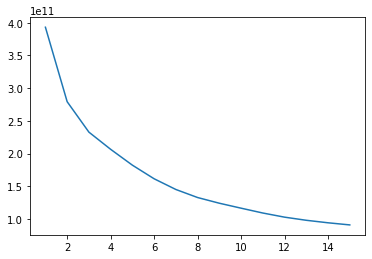

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 16):
    kmeans = KMeans(i, n_init=15)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,16), wcss)
plt.show()

In [62]:
kmeans = KMeans(6)
Y_kmeans = kmeans.fit_predict(data)

In [63]:
from sklearn.decomposition import PCA
pca = PCA(2)
x = pca.fit_transform(data)

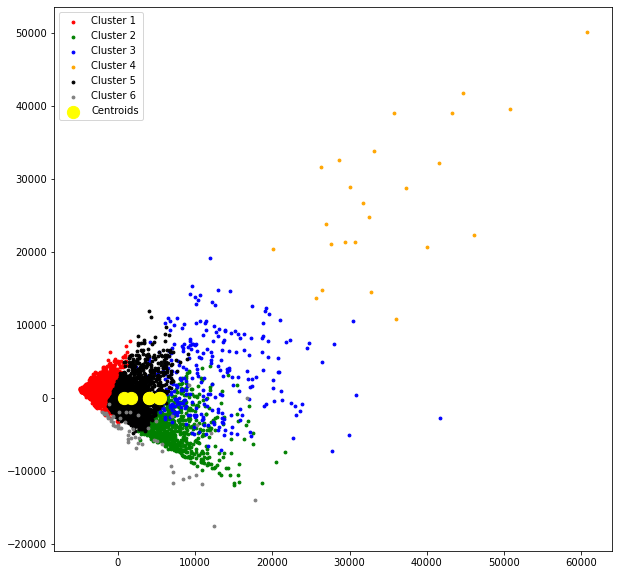

In [74]:
plt.figure(figsize=(10,10))
plt.scatter(x[Y_kmeans==0, 0], x[Y_kmeans==0, 1], s=8, c='red', label='Cluster 1')
plt.scatter(x[Y_kmeans==1, 0], x[Y_kmeans==1, 1], s=8, c='green', label='Cluster 2')
plt.scatter(x[Y_kmeans==2, 0], x[Y_kmeans==2, 1], s=8, c='blue', label='Cluster 3')
plt.scatter(x[Y_kmeans==3, 0], x[Y_kmeans==3, 1], s=8, c='orange', label='Cluster 4')
plt.scatter(x[Y_kmeans==4, 0], x[Y_kmeans==4, 1], s=8, c='black', label='Cluster 5')
plt.scatter(x[Y_kmeans==5, 0], x[Y_kmeans==5, 1], s=8, c='gray', label='Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='yellow', label='Centroids')
plt.legend()
plt.show()